## Rasheed Hameed
## Assignment 2 
## Problem 3 - Census data

__For this problem you will use a simplified version of the Adult Census Data Set. In the subset provided here, some of the attributes have been removed and some preprocessing has been performed.__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
#Read the data into panda's dataframe
df = pd.read_csv("adult-modified.csv", na_values=['?'])
df.head(10)

age workclass  education marital-status   race     sex  hours-per-week  \
0  39.0    Public         13         Single  White    Male              40   
1  50.0  Self-emp         13        Married  White    Male              13   
2  38.0   Private          9         Single  White    Male              40   
3  53.0   Private          7        Married  Black    Male              40   
4  28.0   Private         13        Married  Black  Female              40   
5  37.0   Private         14        Married  White  Female              40   
6  49.0   Private          5        Married  Black  Female              16   
7  52.0  Self-emp          9        Married  White    Male              45   
8  31.0   Private         14         Single  White  Female              50   
9  42.0   Private         13        Married  White    Male              40   

  income  
0  <=50K  
1  <=50K  
2  <=50K  
3  <=50K  
4  <=50K  
5  <=50K  
6  <=50K  
7   >50K  
8   >50K  
9   >50K

__a. Preprocessing and data analysis:__ 

__*Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.__

__*Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distributions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.__

__*Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.__

__*Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.__


In [3]:
df.describe(include='all')


age workclass     education marital-status   race    sex  \
count   9802.000000      9412  10000.000000          10000  10000  10000   
unique          NaN         3           NaN              2      5      2   
top             NaN   Private           NaN         Single  White   Male   
freq            NaN      6947           NaN           5017   8556   6703   
mean      38.449806       NaN     10.076600            NaN    NaN    NaN   
std       13.611949       NaN      2.548172            NaN    NaN    NaN   
min       17.000000       NaN      1.000000            NaN    NaN    NaN   
25%       27.000000       NaN      9.000000            NaN    NaN    NaN   
50%       37.000000       NaN     10.000000            NaN    NaN    NaN   
75%       47.000000       NaN     12.000000            NaN    NaN    NaN   
max       90.000000       NaN     16.000000            NaN    NaN    NaN   

        hours-per-week income  
count     10000.000000  10000  
unique             NaN      2  
top                NaN  <=50K  
freq               NaN   7621  
mean         40.530300    NaN  
std          12.277197    NaN  
min           1.000000    NaN  
25%          40.000000    NaN  
50%          40.000000    NaN  
75%          45.000000    NaN  
max          99.000000    NaN

*from first observation of missing values we see that age, workclass, education, marital-status, race, sex, hours-per-week, and income all have missing items.  Categorical variables that need to be scrubbed for missing values are workclass, marital_status, race, sex, and income*

In [4]:
df.columns


Index(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

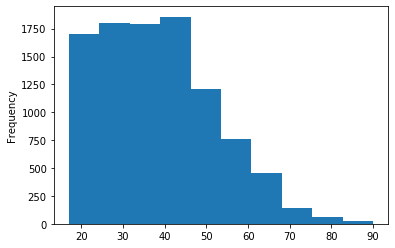

In [5]:
df["age"].plot(kind="hist", bins=10)


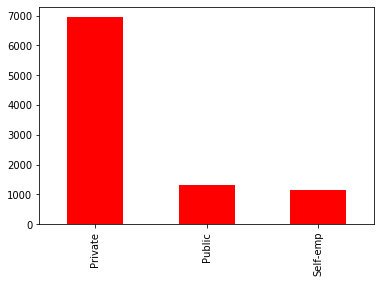

In [6]:
df['workclass'].value_counts().plot(kind='bar', color='red')

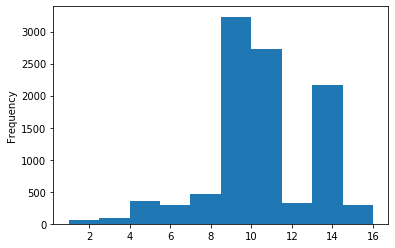

In [7]:
df["education"].plot(kind="hist", bins=10)

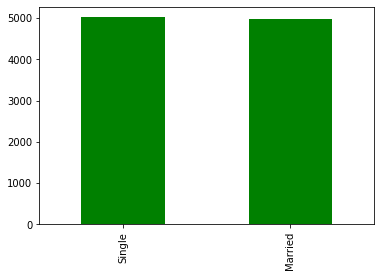

In [8]:
df['marital-status'].value_counts().plot(kind='bar', color='green')

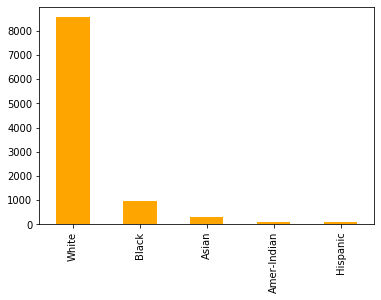

In [9]:
df['race'].value_counts().plot(kind='bar', color='orange')

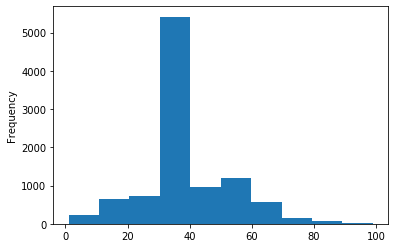

In [10]:
df['hours-per-week'].plot(kind="hist", bins=10)

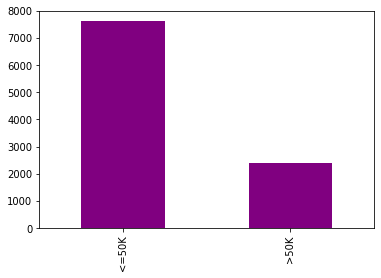

In [11]:
df['income'].value_counts().plot(kind='bar', color='purple')

In [12]:
df.isnull().sum()

age               198
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [13]:
df.shape

(10000, 8)

In [14]:
df['workclass'].value_counts()

Private     6947
Public      1317
Self-emp    1148
Name: workclass, dtype: int64

In [15]:
#interpolate using the mean in age
age_mean = df.age.mean()
df.age.fillna(age_mean, axis=0, inplace=True)


In [16]:
#dropping all the 588 records of na from workclass
df = df.dropna(subset=['workclass'])

In [17]:
df.shape

(9412, 8)

In [18]:
df.describe()

age    education  hours-per-week
count  9412.000000  9412.000000     9412.000000
mean     38.366342    10.125266       41.080217
std      12.962039     2.542118       11.884590
min      17.000000     1.000000        1.000000
25%      28.000000     9.000000       40.000000
50%      37.000000    10.000000       40.000000
75%      47.000000    13.000000       45.000000
max      90.000000    16.000000       99.000000

__*Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.__

In [19]:
gg = pd.crosstab(df["education"],df["race"])
gg

race       Amer-Indian  Asian  Black  Hispanic  White
education                                            
1                    0      0      1         0     11
2                    0      1      4         3     38
3                    0      4      5         1     71
4                    5      5     14         6    150
5                    0      3     19         2    118
6                    8      3     30         4    223
7                    4      6     49         4    261
8                    0      2     17         3     78
9                   35     67    350        23   2590
10                  26     64    206        11   1818
11                   5     10     33         4    337
12                   4      5     33         3    259
13                   5     75    102         8   1387
14                   0     27     20         1    467
15                   0     11      5         2    153
16                   0      8      4         0    101

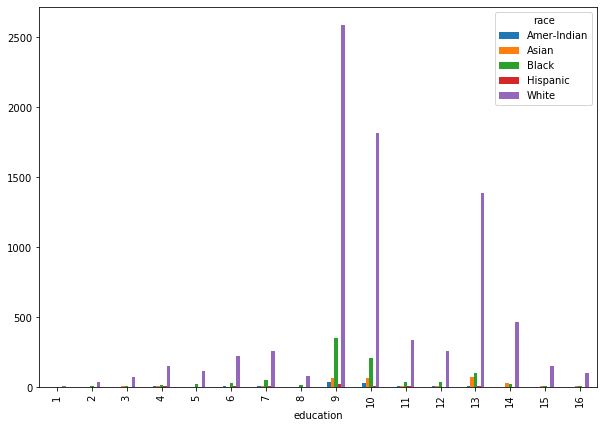

In [20]:
gg.plot(kind="bar",figsize=(10,7))


In [21]:
gg = pd.crosstab(df["workclass"],df["income"])
gg

income     <=50K  >50K
workclass             
Private     5443  1504
Public       925   392
Self-emp     725   423

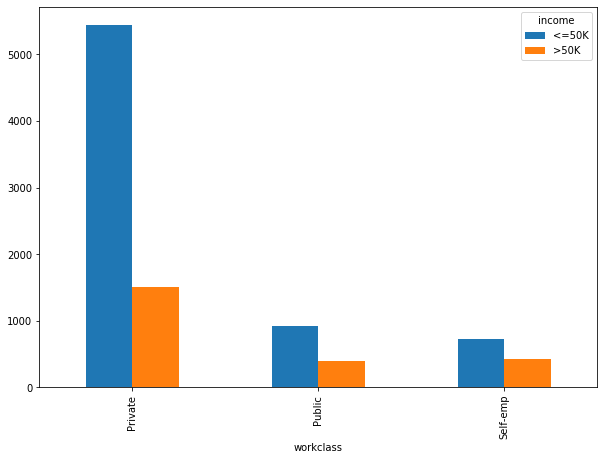

In [22]:
gg.plot(kind="bar",figsize=(10,7))

In [23]:
gg = pd.crosstab(df["workclass"],df["race"])
gg

race       Amer-Indian  Asian  Black  Hispanic  White
workclass                                            
Private             65    204    664        64   5950
Public              20     48    192         5   1052
Self-emp             7     39     36         6   1060

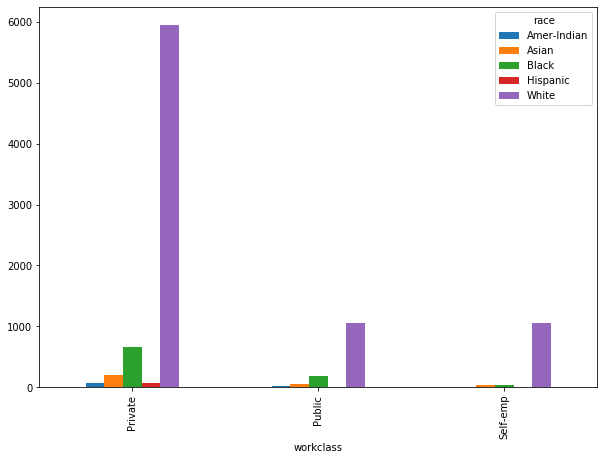

In [24]:
gg.plot(kind="bar",figsize=(10,7))

In [25]:
gg = pd.crosstab(df["race"],df["income"])
gg

income       <=50K  >50K
race                    
Amer-Indian     83     9
Asian          224    67
Black          773   119
Hispanic        69     6
White         5944  2118

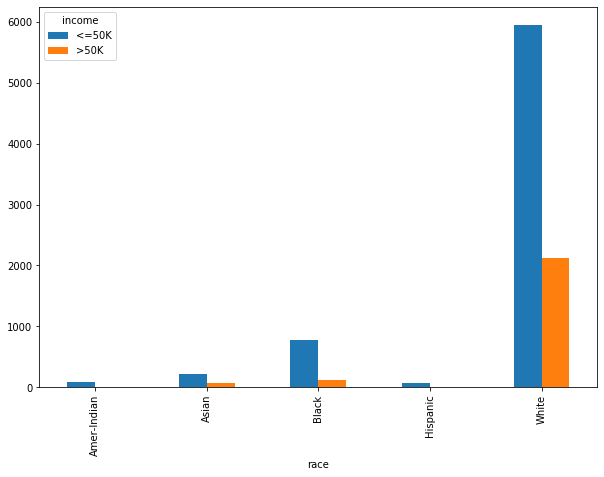

In [26]:
gg.plot(kind="bar",figsize=(10,7))

In [27]:
#chart showing percentages of each race category that fall in the low-income group
gg = (pd.crosstab(df["race"],df["income"]) /pd.crosstab(df["race"],df["income"]).sum())*100  
gg


income           <=50K       >50K
race                             
Amer-Indian   1.170168   0.388098
Asian         3.158043   2.889176
Black        10.898069   5.131522
Hispanic      0.972790   0.258732
White        83.800930  91.332471

*from the bar graph and chart it is visible that the majority of the population for this data set are whites.  The white population from this data set also have the 83% make less than 50K, followed by black at 11% and the least at for hispanic 1%.  For higher than 50K income indviduals belong to white race.  The lowest set of individuals belong to Amer-Indian race and they fall at 0.4%.*

__b. Predictive Modeling and Model Evaluation:__ 

__*Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps).__

__*Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy.__

__*For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.__


In [28]:
df_modified = pd.get_dummies(df)
df_modified.head()

age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   

   sex_Female  sex_Male  income_<=50K  income_>50K  
0           0         1             1            0  
1           0         1             1            0  
2           0         1             1            0  
3           0         1             1            0  
4           1         0             1            0

In [29]:
#separate the target attribute ("income_>50K")
df_target = df_modified['income_>50K']
df_target.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income_>50K, dtype: uint8

In [30]:
#drop "income_<=50K" which is also created as a dummy variable in earlier steps)
df_new = df_modified.drop(['income_<=50K','income_>50K'], axis=1)
df_new.head()

age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   

   sex_Female  sex_Male  
0           0         1  
1           0         1  
2           0         1  
3           0         1  
4           1         0

__Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy.__

In [31]:
from sklearn import tree, naive_bayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection


__Naive Bayes (Gaussian)__

In [32]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(df_new, df_target)

cv_scores = model_selection.cross_val_score(nbclf, df_new, df_target, cv=10)
cv_scores

print("Overall Accuracy on cross-validation is: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy on cross-validation is: 0.72 (+/- 0.02)


__Decision tree (using "entropy" as selection criteria)__

In [33]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(df_new, df_target)
cv_scores = model_selection.cross_val_score(treeclf, df_new, df_target, cv=10)
cv_scores

print("Overall Accuracy on cross-validation is: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy on cross-validation is: 0.77 (+/- 0.02)


__Linear Discriminant Analysis (LDA)__

In [34]:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(df_new, df_target)
cv_scores = model_selection.cross_val_score(ldclf, df_new, df_target, cv=10)
cv_scores

print("Overall Accuracy on cross-validation is: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

C:\Users\rhame\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rhame\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rhame\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rhame\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rhame\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rhame\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rhame\Anacond

Overall Accuracy on cross-validation is: 0.81 (+/- 0.02)


C:\Users\rhame\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


__For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.__

In [35]:
import graphviz
from sklearn.tree import export_graphviz


In [37]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
treeclf = treeclf.fit(df_new, df_target)
export_graphviz(treeclf,out_file='tree.dot', feature_names=df_new.columns )

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [39]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','OutputFile.png'])

0